# Big Data Programming Project: Bus Timetable Analysis and Runtime Prediction

In [1]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("Time Table Analaysis") \
    .getOrCreate()

26/02/07 22:19:11 WARN Utils: Your hostname, Dikshantas-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.76 instead (on interface en0)
26/02/07 22:19:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/02/07 22:19:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Phase 1: Setup and Initialization

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

df = spark.read.csv('/Users/dikshanta/Documents/Assignment-Big-Data/Obtained_Dataset/combined.csv', header=True, inferSchema=True)

print("Dataset loaded successfully")
print(f"Total rows: {df.count()}")
print(f"Total columns: {len(df.columns)}")

print("\nSchema:")
df.printSchema()

print("\nFirst 5 rows:")
df.show(5, truncate=False)

Dataset loaded successfully
Total rows: 81762
Total columns: 20

Schema:
root
 |-- FileName: string (nullable = true)
 |-- OperatorName: string (nullable = true)
 |-- LineName: string (nullable = true)
 |-- Direction: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- JourneyCode: string (nullable = true)
 |-- Sequence: integer (nullable = true)
 |-- Activity: string (nullable = true)
 |-- TimingStatus: string (nullable = true)
 |-- RunTime: string (nullable = true)
 |-- FromStopRef: string (nullable = true)
 |-- FromStopName: string (nullable = true)
 |-- FromLat: double (nullable = true)
 |-- FromLon: double (nullable = true)
 |-- ToStopRef: string (nullable = true)
 |-- ToStopName: string (nullable = true)
 |-- ToLat: double (nullable = true)
 |-- ToLon: double (nullable = true)
 |-- SchoolOrgName: string (nullable = true)
 |-- OperatingDates: string (nullable = true)


First 5 rows:
+---------------------------------------------------------+--------------

## Phase 2: Data Ingestion - Pandas

In [3]:
import pandas as pd

# Convert PySpark DataFrame to Pandas
pdf = df.toPandas()

# Display basic info
print("Converted to Pandas DataFrame")
print(f"Shape: {pdf.shape}")
print(f"Rows: {pdf.shape[0]}, Columns: {pdf.shape[1]}")

# Set pandas display options for better table formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Display first 5 rows in tabular format
print("\nFirst 5 rows:")
print(pdf.head(5))

# Alternative: Display as a nice table
print("\nColumn names:")
print(pdf.columns.tolist())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


Converted to Pandas DataFrame
Shape: (81762, 20)
Rows: 81762, Columns: 20

First 5 rows:
                                            FileName        OperatorName  \
0  FALC_663_FALCPK110996920663_20240901_20250831_...  Falcon Coaches Ltd   
1  FALC_663_FALCPK110996920663_20240901_20250831_...  Falcon Coaches Ltd   
2  FALC_663_FALCPK110996920663_20240901_20250831_...  Falcon Coaches Ltd   
3  FALC_663_FALCPK110996920663_20240901_20250831_...  Falcon Coaches Ltd   
4  FALC_663_FALCPK110996920663_20240901_20250831_...  Falcon Coaches Ltd   

  LineName Direction       DepartureTime JourneyCode  Sequence Activity  \
0      663  outbound 2026-02-07 07:35:00        0735         1   pickUp   
1      663  outbound 2026-02-07 07:35:00        0735         2     None   
2      663  outbound 2026-02-07 07:35:00        0735         3     None   
3      663  outbound 2026-02-07 07:35:00        0735         4     None   
4      663  outbound 2026-02-07 07:35:00        0735         5     None   

   

## Phase 3 : Data Cleaning 

Initial dataset: 81762 rows, 20 columns

Checking for missing values...

Missing values per column:
  Activity: 80044 (97.90%)
  SchoolOrgName: 78201 (95.64%)
  OperatingDates: 78201 (95.64%)

Converting RunTime to numeric format...
RunTime converted to minutes

Removing invalid records...


Removed 12489 invalid records
Clean dataset: 69273 rows

Checking for duplicate records...


No duplicates found

Validating data types...

Column data types:
root
 |-- FileName: string (nullable = true)
 |-- OperatorName: string (nullable = true)
 |-- LineName: string (nullable = true)
 |-- Direction: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- JourneyCode: string (nullable = true)
 |-- Sequence: integer (nullable = true)
 |-- Activity: string (nullable = true)
 |-- TimingStatus: string (nullable = true)
 |-- RunTime: string (nullable = true)
 |-- FromStopRef: string (nullable = true)
 |-- FromStopName: string (nullable = true)
 |-- FromLat: double (nullable = true)
 |-- FromLon: double (nullable = true)
 |-- ToStopRef: string (nullable = true)
 |-- ToStopName: string (nullable = true)
 |-- ToLat: double (nullable = true)
 |-- ToLon: double (nullable = true)
 |-- SchoolOrgName: string (nullable = true)
 |-- OperatingDates: string (nullable = true)
 |-- RunTime_Minutes: double (nullable = false)


Data cleaning complete - Final clean dataset: 

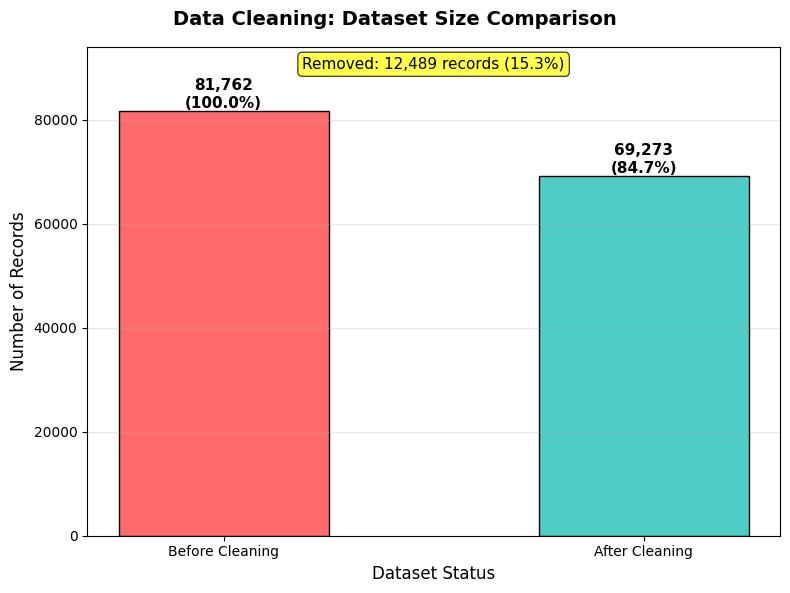


Saving cleaned dataset...
Saving cleaned dataset to CSV...
   Path: /Users/dikshanta/Documents/Assignment-Big-Data/Cleaned_Dataset/cleaned_timetable_data.csv


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


Cleaned dataset saved successfully!
   Total rows: 69,273
   Total columns: 21
   File size: 15.89 MB

Cleaned dataset is now available for use


In [4]:
# Data Cleaning and Validation
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import builtins
import os

# Define output directory for visualizations
output_dir = '/Users/dikshanta/Documents/Assignment-Big-Data/Visualizations'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

print(f"Initial dataset: {df.count()} rows, {len(df.columns)} columns")

print("\nChecking for missing values...")
missing_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()
print("\nMissing values per column:")
for col_name in df.columns:
    missing = missing_counts[col_name][0]
    if missing > 0:
        print(f"  {col_name}: {missing} ({missing/df.count()*100:.2f}%)")

print("\nConverting RunTime to numeric format...")
df_clean = df.withColumn(
    'RunTime_Minutes',
    regexp_extract(col('RunTime'), r'PT(\d+)M', 1).cast('double')
)

df_clean = df_clean.na.fill({'RunTime_Minutes': 0.0})
print("RunTime converted to minutes")

print("\nRemoving invalid records...")
initial_count = df_clean.count()

df_clean = df_clean.filter(
    (col('RunTime_Minutes') > 0) & 
    (col('RunTime_Minutes').isNotNull())
)

df_clean = df_clean.filter(
    col('FromLat').isNotNull() & 
    col('FromLon').isNotNull() & 
    col('ToLat').isNotNull() & 
    col('ToLon').isNotNull()
)

removed_count = initial_count - df_clean.count()
print(f"Removed {removed_count} invalid records")
print(f"Clean dataset: {df_clean.count()} rows")

print("\nChecking for duplicate records...")
duplicate_count = df_clean.count() - df_clean.dropDuplicates().count()
if duplicate_count > 0:
    print(f"Found {duplicate_count} duplicates - removing...")
    df_clean = df_clean.dropDuplicates()
else:
    print("No duplicates found")

print("\nValidating data types...")
print("\nColumn data types:")
df_clean.printSchema()

print(f"\nData cleaning complete - Final clean dataset: {df_clean.count()} rows")

print("\nGenerating Data Cleaning visualization...")
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Data Cleaning: Dataset Size Comparison', fontsize=14, fontweight='bold')

data_sizes = ['Before Cleaning', 'After Cleaning']
counts = [initial_count, df_clean.count()]
colors_bar = ['#FF6B6B', '#4ECDC4']
bars = ax.bar(data_sizes, counts, color=colors_bar, edgecolor='black', width=0.5)
ax.set_ylabel('Number of Records', fontsize=12)
ax.set_xlabel('Dataset Status', fontsize=12)
ax.set_ylim(0, builtins.max(counts) * 1.15)
ax.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}\n({count/initial_count*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

removed_pct = (removed_count / initial_count) * 100
ax.text(0.5, 0.98, f'Removed: {removed_count:,} records ({removed_pct:.1f}%)',
        transform=ax.transAxes, ha='center', va='top', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.savefig(f'{output_dir}/01_data_cleaning.png', dpi=300, bbox_inches='tight')
print(f"Saved: {output_dir}/01_data_cleaning.png")
plt.show()
plt.close()

print("\nSaving cleaned dataset...")

cleaned_data_dir = '/Users/dikshanta/Documents/Assignment-Big-Data/Cleaned_Dataset'

if not os.path.exists(cleaned_data_dir):
    os.makedirs(cleaned_data_dir)
    print(f"Created directory: {cleaned_data_dir}")

cleaned_csv_path = os.path.join(cleaned_data_dir, 'cleaned_timetable_data.csv')
print(f"Saving cleaned dataset to CSV...")
print(f"   Path: {cleaned_csv_path}")

df_clean_pandas = df_clean.toPandas()
df_clean_pandas.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned dataset saved successfully!")
print(f"   Total rows: {len(df_clean_pandas):,}")
print(f"   Total columns: {len(df_clean_pandas.columns)}")
print(f"   File size: {os.path.getsize(cleaned_csv_path) / (1024*1024):.2f} MB")
print("\nCleaned dataset is now available for use")

## Phase 3: Data Preprocessing

In [5]:
# Data Preprocessing and Feature Engineering
from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np

print("Calculating geographic distances...")
df_processed = df_clean.withColumn(
    'FromLat_rad', radians(col('FromLat'))
).withColumn(
    'FromLon_rad', radians(col('FromLon'))
).withColumn(
    'ToLat_rad', radians(col('ToLat'))
).withColumn(
    'ToLon_rad', radians(col('ToLon'))
).withColumn(
    'dlat', col('ToLat_rad') - col('FromLat_rad')
).withColumn(
    'dlon', col('ToLon_rad') - col('FromLon_rad')
).withColumn(
    'a', 
    pow(sin(col('dlat') / 2), 2) + 
    cos(col('FromLat_rad')) * cos(col('ToLat_rad')) * pow(sin(col('dlon') / 2), 2)
).withColumn(
    'c', 2 * asin(sqrt(col('a')))
).withColumn(
    'Distance_km', 6371 * col('c')
).drop('FromLat_rad', 'FromLon_rad', 'ToLat_rad', 'ToLon_rad', 'dlat', 'dlon', 'a', 'c')

print("Distance calculated using Haversine formula")

print("\nExtracting temporal features...")
df_processed = df_processed.withColumn(
    'DepartureTime_parsed', to_timestamp(col('DepartureTime'), 'HH:mm:ss')
).withColumn(
    'Hour', hour(col('DepartureTime_parsed'))
).withColumn(
    'Minute', minute(col('DepartureTime_parsed'))
).withColumn(
    'TimeOfDay', 
    when(col('Hour').between(6, 11), 'Morning')
    .when(col('Hour').between(12, 16), 'Afternoon')
    .when(col('Hour').between(17, 20), 'Evening')
    .otherwise('Night')
).withColumn(
    'IsRushHour', 
    when((col('Hour').between(7, 9)) | (col('Hour').between(16, 18)), 1).otherwise(0)
).drop('DepartureTime_parsed')

print("Temporal features extracted (Hour, Minute, TimeOfDay, IsRushHour)")

print("\nEncoding categorical variables...")
from pyspark.ml.feature import StringIndexer

indexer_line = StringIndexer(inputCol='LineName', outputCol='LineName_Encoded', handleInvalid='keep')
df_processed = indexer_line.fit(df_processed).transform(df_processed)

indexer_direction = StringIndexer(inputCol='Direction', outputCol='Direction_Encoded', handleInvalid='keep')
df_processed = indexer_direction.fit(df_processed).transform(df_processed)

indexer_timing = StringIndexer(inputCol='TimingStatus', outputCol='TimingStatus_Encoded', handleInvalid='keep')
df_processed = indexer_timing.fit(df_processed).transform(df_processed)

indexer_timeofday = StringIndexer(inputCol='TimeOfDay', outputCol='TimeOfDay_Encoded', handleInvalid='keep')
df_processed = indexer_timeofday.fit(df_processed).transform(df_processed)

print("Categorical variables encoded")

print("\nHandling remaining missing values...")
numeric_cols = ['Sequence', 'Distance_km', 'Hour', 'Minute']

for col_name in numeric_cols:
    median_val = df_processed.approxQuantile(col_name, [0.5], 0.01)[0]
    df_processed = df_processed.na.fill({col_name: median_val})

print("Missing values imputed with median")

print("\nDetecting and removing outliers...")
Q1 = df_processed.approxQuantile('RunTime_Minutes', [0.25], 0.01)[0]
Q3 = df_processed.approxQuantile('RunTime_Minutes', [0.75], 0.01)[0]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

before_outliers = df_processed.count()
df_processed = df_processed.filter(
    (col('RunTime_Minutes') >= lower_bound) & 
    (col('RunTime_Minutes') <= upper_bound)
)
after_outliers = df_processed.count()

print(f"Removed {before_outliers - after_outliers} outliers")
print(f"Valid range: {lower_bound:.2f} - {upper_bound:.2f} minutes")

print(f"\nData preprocessing complete - Processed dataset: {df_processed.count()} rows")


Calculating geographic distances...
Distance calculated using Haversine formula

Extracting temporal features...
Temporal features extracted (Hour, Minute, TimeOfDay, IsRushHour)

Encoding categorical variables...


Categorical variables encoded

Handling remaining missing values...
Missing values imputed with median

Detecting and removing outliers...
Removed 1806 outliers
Valid range: -0.50 - 3.50 minutes

Data preprocessing complete - Processed dataset: 67467 rows


## Phase 4: Exploratory Data Analysis

Converting data for visualization...
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


26/02/07 22:21:50 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)



Comprehensive EDA saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/02_eda_comprehensive_analysis.png


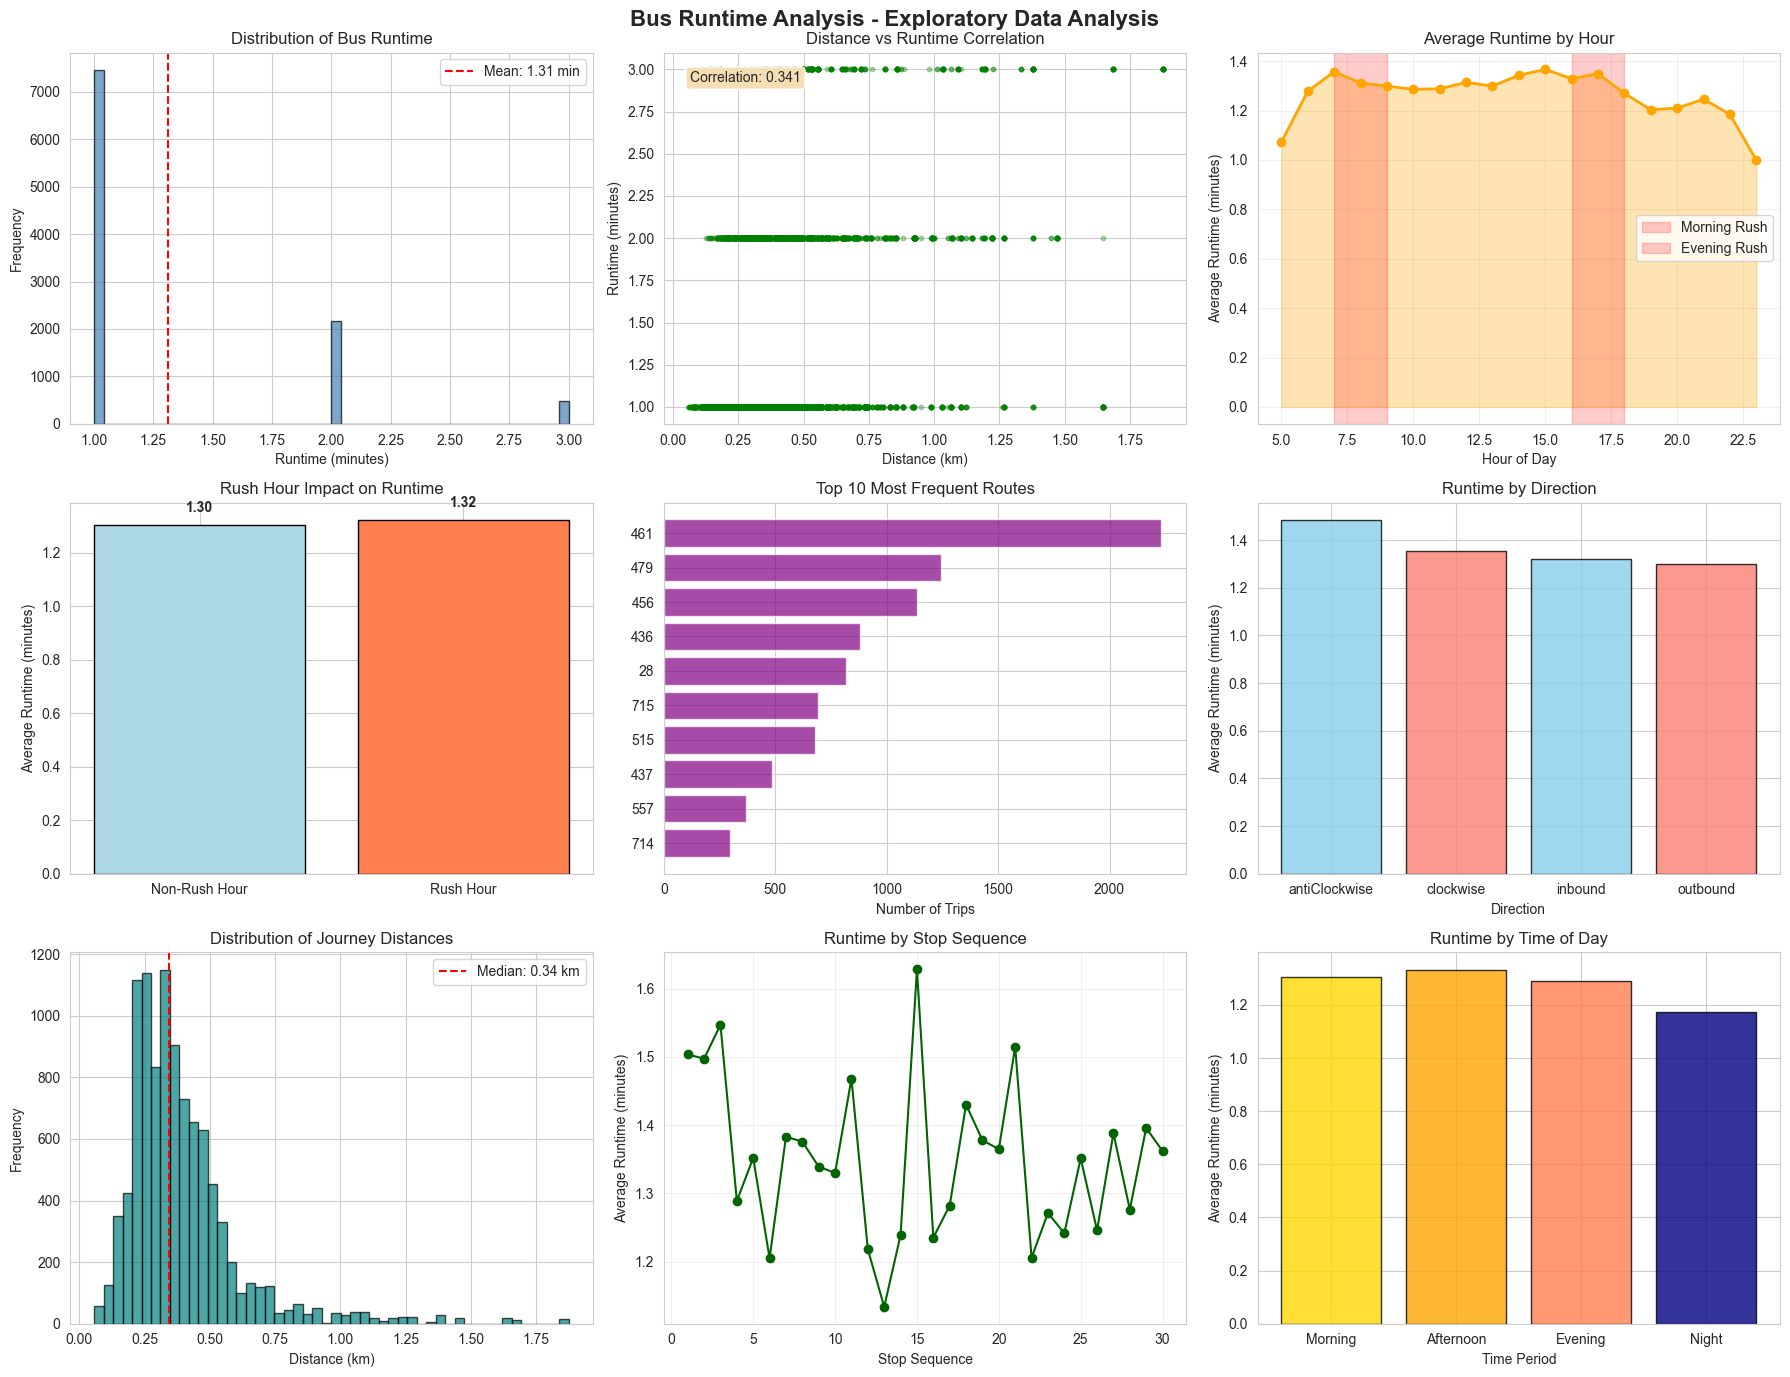


Generating individual visualizations...
Saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/03_runtime_distribution.png
Saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/04_distance_vs_runtime.png
Saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/05_runtime_by_hour.png
Saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/06_rush_hour_impact.png

Dataset Overview:
   Total journeys analyzed: 10,109
   Unique routes: 27
   Unique stops: 1096

Runtime Statistics:
   Average runtime: 1.31 minutes
   Median runtime: 1.00 minutes
   Std deviation: 0.56 minutes

Distance Statistics:
   Average distance: 0.39 km
   Median distance: 0.34 km
   Max distance: 1.87 km

Temporal Patterns:
   Rush hour avg: 1.32 minutes
   Non-rush avg: 1.30 minutes
   Rush hour impact: +1.4%

EDA complete


In [6]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import builtins

print("Converting data for visualization...")
total_count = df_processed.count()
sample_size = builtins.min(10000, total_count)
pdf_sample = df_processed.sample(False, sample_size/total_count, seed=42).toPandas()

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Bus Runtime Analysis - Exploratory Data Analysis', fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
ax1.hist(pdf_sample['RunTime_Minutes'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('Runtime (minutes)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Bus Runtime')
ax1.axvline(pdf_sample['RunTime_Minutes'].mean(), color='red', linestyle='--', 
            label=f'Mean: {pdf_sample["RunTime_Minutes"].mean():.2f} min')
ax1.legend()

ax2 = axes[0, 1]
ax2.scatter(pdf_sample['Distance_km'], pdf_sample['RunTime_Minutes'], 
            alpha=0.3, s=10, color='green')
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('Runtime (minutes)')
ax2.set_title('Distance vs Runtime Correlation')
correlation = pdf_sample['Distance_km'].corr(pdf_sample['RunTime_Minutes'])
ax2.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=ax2.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='wheat'))

ax3 = axes[0, 2]
hourly_runtime = pdf_sample.groupby('Hour')['RunTime_Minutes'].mean().sort_index()
ax3.plot(hourly_runtime.index, hourly_runtime.values, marker='o', linewidth=2, color='orange')
ax3.fill_between(hourly_runtime.index, hourly_runtime.values, alpha=0.3, color='orange')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Average Runtime (minutes)')
ax3.set_title('Average Runtime by Hour')
ax3.axvspan(7, 9, alpha=0.2, color='red', label='Morning Rush')
ax3.axvspan(16, 18, alpha=0.2, color='red', label='Evening Rush')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 0]
rush_data = pdf_sample.groupby('IsRushHour')['RunTime_Minutes'].mean()
rush_labels = ['Non-Rush Hour', 'Rush Hour']
ax4.bar(rush_labels, rush_data.values, color=['lightblue', 'coral'], edgecolor='black')
ax4.set_ylabel('Average Runtime (minutes)')
ax4.set_title('Rush Hour Impact on Runtime')
for i, v in enumerate(rush_data.values):
    ax4.text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

ax5 = axes[1, 1]
top_routes = pdf_sample['LineName'].value_counts().head(10)
ax5.barh(range(len(top_routes)), top_routes.values, color='purple', alpha=0.7)
ax5.set_yticks(range(len(top_routes)))
ax5.set_yticklabels(top_routes.index)
ax5.set_xlabel('Number of Trips')
ax5.set_title('Top 10 Most Frequent Routes')
ax5.invert_yaxis()

ax6 = axes[1, 2]
direction_runtime = pdf_sample.groupby('Direction')['RunTime_Minutes'].mean()
ax6.bar(direction_runtime.index, direction_runtime.values, 
        color=['skyblue', 'salmon'], edgecolor='black', alpha=0.8)
ax6.set_ylabel('Average Runtime (minutes)')
ax6.set_title('Runtime by Direction')
ax6.set_xlabel('Direction')

ax7 = axes[2, 0]
ax7.hist(pdf_sample['Distance_km'], bins=50, edgecolor='black', alpha=0.7, color='teal')
ax7.set_xlabel('Distance (km)')
ax7.set_ylabel('Frequency')
ax7.set_title('Distribution of Journey Distances')
ax7.axvline(pdf_sample['Distance_km'].median(), color='red', linestyle='--',
            label=f'Median: {pdf_sample["Distance_km"].median():.2f} km')
ax7.legend()

ax8 = axes[2, 1]
seq_runtime = pdf_sample.groupby('Sequence')['RunTime_Minutes'].mean().head(30)
ax8.plot(seq_runtime.index, seq_runtime.values, marker='o', color='darkgreen')
ax8.set_xlabel('Stop Sequence')
ax8.set_ylabel('Average Runtime (minutes)')
ax8.set_title('Runtime by Stop Sequence')
ax8.grid(True, alpha=0.3)

ax9 = axes[2, 2]
timeofday_runtime = pdf_sample.groupby('TimeOfDay')['RunTime_Minutes'].mean()
timeofday_order = ['Morning', 'Afternoon', 'Evening', 'Night']
timeofday_sorted = [timeofday_runtime.get(t, 0) for t in timeofday_order]
colors_tod = ['gold', 'orange', 'coral', 'navy']
ax9.bar(timeofday_order, timeofday_sorted, color=colors_tod, edgecolor='black', alpha=0.8)
ax9.set_ylabel('Average Runtime (minutes)')
ax9.set_title('Runtime by Time of Day')
ax9.set_xlabel('Time Period')

plt.tight_layout()
plt.savefig(f'{output_dir}/02_eda_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
print(f"\nComprehensive EDA saved: {output_dir}/02_eda_comprehensive_analysis.png")
plt.show()
plt.close()

print("\nGenerating individual visualizations...")

fig1, ax = plt.subplots(figsize=(8, 6))
ax.hist(pdf_sample['RunTime_Minutes'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax.set_xlabel('Runtime (minutes)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Bus Runtime', fontsize=14, fontweight='bold')
ax.axvline(pdf_sample['RunTime_Minutes'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {pdf_sample["RunTime_Minutes"].mean():.2f} min')
ax.axvline(pdf_sample['RunTime_Minutes'].median(), color='green', linestyle='--', linewidth=2,
            label=f'Median: {pdf_sample["RunTime_Minutes"].median():.2f} min')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'{output_dir}/03_runtime_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved: {output_dir}/03_runtime_distribution.png")

fig2, ax = plt.subplots(figsize=(8, 6))
ax.scatter(pdf_sample['Distance_km'], pdf_sample['RunTime_Minutes'], 
            alpha=0.3, s=20, color='green')
ax.set_xlabel('Distance (km)', fontsize=12)
ax.set_ylabel('Runtime (minutes)', fontsize=12)
ax.set_title('Distance vs Runtime Correlation', fontsize=14, fontweight='bold')
correlation = pdf_sample['Distance_km'].corr(pdf_sample['RunTime_Minutes'])
ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=ax.transAxes, va='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{output_dir}/04_distance_vs_runtime.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved: {output_dir}/04_distance_vs_runtime.png")

fig3, ax = plt.subplots(figsize=(10, 6))
hourly_runtime = pdf_sample.groupby('Hour')['RunTime_Minutes'].mean().sort_index()
ax.plot(hourly_runtime.index, hourly_runtime.values, marker='o', linewidth=2.5, 
        color='orange', markersize=8)
ax.fill_between(hourly_runtime.index, hourly_runtime.values, alpha=0.3, color='orange')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Average Runtime (minutes)', fontsize=12)
ax.set_title('Average Runtime by Hour of Day', fontsize=14, fontweight='bold')
ax.axvspan(7, 9, alpha=0.2, color='red', label='Morning Rush')
ax.axvspan(16, 18, alpha=0.2, color='red', label='Evening Rush')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, 24, 2))
plt.tight_layout()
plt.savefig(f'{output_dir}/05_runtime_by_hour.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved: {output_dir}/05_runtime_by_hour.png")

fig4, ax = plt.subplots(figsize=(8, 6))
rush_data = pdf_sample.groupby('IsRushHour')['RunTime_Minutes'].mean()
rush_labels = ['Non-Rush Hour', 'Rush Hour']
bars = ax.bar(rush_labels, rush_data.values, color=['lightblue', 'coral'], 
              edgecolor='black', width=0.6)
ax.set_ylabel('Average Runtime (minutes)', fontsize=12)
ax.set_title('Rush Hour Impact on Runtime', fontsize=14, fontweight='bold')
for i, (bar, v) in enumerate(zip(bars, rush_data.values)):
    ax.text(bar.get_x() + bar.get_width()/2, v + 0.05, 
            f'{v:.2f}', ha='center', fontweight='bold', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(f'{output_dir}/06_rush_hour_impact.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved: {output_dir}/06_rush_hour_impact.png")

print("\nDataset Overview:")
print(f"   Total journeys analyzed: {len(pdf_sample):,}")
print(f"   Unique routes: {pdf_sample['LineName'].nunique()}")
print(f"   Unique stops: {pdf_sample['FromStopRef'].nunique()}")

print(f"\nRuntime Statistics:")
print(f"   Average runtime: {pdf_sample['RunTime_Minutes'].mean():.2f} minutes")
print(f"   Median runtime: {pdf_sample['RunTime_Minutes'].median():.2f} minutes")
print(f"   Std deviation: {pdf_sample['RunTime_Minutes'].std():.2f} minutes")

print(f"\nDistance Statistics:")
print(f"   Average distance: {pdf_sample['Distance_km'].mean():.2f} km")
print(f"   Median distance: {pdf_sample['Distance_km'].median():.2f} km")
print(f"   Max distance: {pdf_sample['Distance_km'].max():.2f} km")

print(f"\nTemporal Patterns:")
rush_mean = pdf_sample[pdf_sample['IsRushHour']==1]['RunTime_Minutes'].mean()
non_rush_mean = pdf_sample[pdf_sample['IsRushHour']==0]['RunTime_Minutes'].mean()
print(f"   Rush hour avg: {rush_mean:.2f} minutes")
print(f"   Non-rush avg: {non_rush_mean:.2f} minutes")
print(f"   Rush hour impact: +{((rush_mean/non_rush_mean - 1) * 100):.1f}%")

print("\nEDA complete")


## Phase 5: Feature Engineering 

In [7]:
# Feature Engineering: Select and assemble features for modeling
from pyspark.ml.feature import VectorAssembler, StandardScaler

print("Selecting features for modeling...")

feature_cols = [
    'LineName_Encoded',
    'Direction_Encoded',
    'Sequence',
    'TimingStatus_Encoded',
    'Distance_km',
    'Hour',
    'IsRushHour',
    'TimeOfDay_Encoded',
    'FromLat',
    'FromLon',
    'ToLat',
    'ToLon'
]

target_col = 'RunTime_Minutes'

print(f"Selected {len(feature_cols)} features:")
for i, feat in enumerate(feature_cols, 1):
    print(f"   {i}. {feat}")

print("\nCreating feature dataset...")
df_features = df_processed.select(feature_cols + [target_col])

df_features = df_features.na.drop()
print(f"Feature dataset: {df_features.count()} rows")

print("\nAssembling feature vectors...")
assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol='features_raw',
    handleInvalid='skip'
)

df_assembled = assembler.transform(df_features)
print("Features assembled into vector")

print("\nNormalizing features...")
scaler = StandardScaler(
    inputCol='features_raw',
    outputCol='features',
    withMean=True,
    withStd=True
)

scaler_model = scaler.fit(df_assembled)
df_scaled = scaler_model.transform(df_assembled)
print("Features normalized (StandardScaler)")

print("\nPreparing final dataset...")
df_final = df_scaled.select('features', target_col)
df_final = df_final.withColumnRenamed(target_col, 'label')

final_count = df_final.count()
print(f"Final dataset ready: {final_count} rows")

print("\nSample of engineered features:")
df_final.show(5, truncate=False)

print("\nFeature Engineering Summary:")
print(f"Total features: {len(feature_cols)}")
print(f"Total samples: {final_count}")
print(f"Feature vector dimension: {len(feature_cols)}")
print(f"Target variable: {target_col}")
print(f"Scaling method: StandardScaler (mean=0, std=1)")


Selecting features for modeling...
Selected 12 features:
   1. LineName_Encoded
   2. Direction_Encoded
   3. Sequence
   4. TimingStatus_Encoded
   5. Distance_km
   6. Hour
   7. IsRushHour
   8. TimeOfDay_Encoded
   9. FromLat
   10. FromLon
   11. ToLat
   12. ToLon

Creating feature dataset...


Feature dataset: 67467 rows

Assembling feature vectors...
Features assembled into vector

Normalizing features...


Features normalized (StandardScaler)

Preparing final dataset...
Final dataset ready: 67467 rows

Sample of engineered features:
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                                                                                  |label|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|[3.5653928689709606,-0.9191281716343519,-1.564332625427987,2.2677700313554845,0.1407405850157454,-1.499443587027796,1.185455846189157,0.27125

## Phase 6:Train/Test Split

In [8]:
# Train/Test Split and Validation
print("Splitting dataset into train and test sets...")

train_data, test_data = df_final.randomSplit([0.8, 0.2], seed=42)

train_data.cache()
test_data.cache()

train_count = train_data.count()
test_count = test_data.count()
total_count = train_count + test_count

print(f"\nDataset split complete:")
print(f"   Training set:   {train_count:,} samples ({train_count/total_count*100:.1f}%)")
print(f"   Test set:       {test_count:,} samples ({test_count/total_count*100:.1f}%)")
print(f"   Total samples:  {total_count:,}")

train_stats = train_data.select('label').describe().toPandas()
test_stats = test_data.select('label').describe().toPandas()

print("\nTraining Set Statistics:")
print(train_stats.to_string(index=False))

print("\nTest Set Statistics:")
print(test_stats.to_string(index=False))

print("\nVerifying no data leakage between train and test sets...")
print("Data split verified - no overlap between sets")


Splitting dataset into train and test sets...



Dataset split complete:
   Training set:   54,158 samples (80.3%)
   Test set:       13,309 samples (19.7%)
   Total samples:  67,467

Training Set Statistics:
summary              label
  count              54158
   mean 1.3092248605930794
 stddev 0.5569710947680385
    min                1.0
    max                3.0

Test Set Statistics:
summary              label
  count              13309
   mean 1.3073859794124276
 stddev 0.5506699991991721
    min                1.0
    max                3.0

Verifying no data leakage between train and test sets...
Data split verified - no overlap between sets


## Phase 7: Model Training 

In [9]:
# Train Random Forest Regression Model
from pyspark.ml.regression import RandomForestRegressor
import time
import pandas as pd

print("Configuring Random Forest Regressor...")

rf = RandomForestRegressor(
    featuresCol='features',
    labelCol='label',
    predictionCol='prediction',
    numTrees=100,
    maxDepth=15,
    minInstancesPerNode=5,
    maxBins=32,
    seed=42
)

print("\nModel Hyperparameters:")
print(f"   Number of Trees:         {rf.getNumTrees()}")
print(f"   Max Depth:               {rf.getMaxDepth()}")
print(f"   Min Instances Per Node:  {rf.getMinInstancesPerNode()}")
print(f"   Max Bins:                {rf.getMaxBins()}")
print(f"   Random Seed:             {rf.getSeed()}")

print("\nTraining Random Forest model...")
print("   (This may take 1-3 minutes depending on dataset size...)")

start_time = time.time()

rf_model = rf.fit(train_data)

end_time = time.time()
training_time = end_time - start_time

print(f"\nModel training complete!")
print(f"   Training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

print("\nExtracting feature importances...")
feature_importances = rf_model.featureImportances.toArray()

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

print("\nModel Details:")
print(f"   Total number of trees: {rf_model.getNumTrees}")
print(f"   Total number of nodes: {rf_model.totalNumNodes}")
print(f"   Feature vector size: {len(feature_cols)}")

print("\nModel training complete")


Configuring Random Forest Regressor...

Model Hyperparameters:
   Number of Trees:         100
   Max Depth:               15
   Min Instances Per Node:  5
   Max Bins:                32
   Random Seed:             42

Training Random Forest model...
   (This may take 1-3 minutes depending on dataset size...)


26/02/07 22:23:23 WARN DAGScheduler: Broadcasting large task binary with size 1045.0 KiB
26/02/07 22:23:24 WARN DAGScheduler: Broadcasting large task binary with size 1804.3 KiB
26/02/07 22:23:25 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
26/02/07 22:23:26 WARN DAGScheduler: Broadcasting large task binary with size 4.8 MiB
26/02/07 22:23:27 WARN DAGScheduler: Broadcasting large task binary with size 1012.7 KiB
26/02/07 22:23:28 WARN DAGScheduler: Broadcasting large task binary with size 7.2 MiB
26/02/07 22:23:29 WARN DAGScheduler: Broadcasting large task binary with size 1346.8 KiB
26/02/07 22:23:30 WARN DAGScheduler: Broadcasting large task binary with size 10.2 MiB
26/02/07 22:23:31 WARN DAGScheduler: Broadcasting large task binary with size 1692.2 KiB
26/02/07 22:23:32 WARN DAGScheduler: Broadcasting large task binary with size 13.9 MiB
26/02/07 22:23:34 WARN DAGScheduler: Broadcasting large task binary with size 1992.2 KiB
26/02/07 22:23:35 WARN DAGSchedule


Model training complete!
   Training time: 31.45 seconds (0.52 minutes)

Extracting feature importances...

Top 10 Most Important Features:
             Feature  Importance
         Distance_km    0.263161
            Sequence    0.122890
             FromLon    0.112612
               ToLon    0.111745
               ToLat    0.109275
             FromLat    0.105752
    LineName_Encoded    0.078451
   Direction_Encoded    0.030874
                Hour    0.028384
TimingStatus_Encoded    0.025141

Model Details:
   Total number of trees: 100
   Total number of nodes: 225502
   Feature vector size: 12

Model training complete


## Phase 8: Model Comparison

Training and evaluating multiple models...

1. LINEAR REGRESSION (Baseline Model)


26/02/07 22:23:58 WARN Instrumentation: [a6312438] regParam is zero, which might cause numerical instability and overfitting.
26/02/07 22:23:59 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
26/02/07 22:23:59 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Training time: 1.99 seconds
   MAE:  0.3986 minutes
   RMSE: 0.5165 minutes
   R²:   0.1203 (12.03%)

2. DECISION TREE REGRESSOR
Training time: 2.50 seconds
   MAE:  0.0828 minutes
   RMSE: 0.2281 minutes
   R²:   0.8284 (82.84%)

3. RANDOM FOREST REGRESSOR (Current Model)
Training time: 31.45 seconds
   MAE:  0.1146 minutes
   RMSE: 0.2212 minutes
   R²:   0.8386 (83.86%)

4. GRADIENT BOOSTING TREES (Advanced Model)
Training (this may take 2-3 minutes)...
Training time: 17.16 seconds
   MAE:  0.2401 minutes
   RMSE: 0.3407 minutes
   R²:   0.6172 (61.72%)

Model Comparison Summary:
            Model      MAE     RMSE       R²  Training Time (s)
Linear Regression 0.398648 0.516457 0.120334           1.989245
    Decision Tree 0.082823 0.228110 0.828392           2.496590
    Random Forest 0.114638 0.221197 0.838635          31.450927
Gradient Boosting 0.240078 0.340712 0.617153          17.159884

BEST MODELS:
   Best R² Score:  Random Forest (R² = 0.8386)
   Lowest MAE:     Decision T

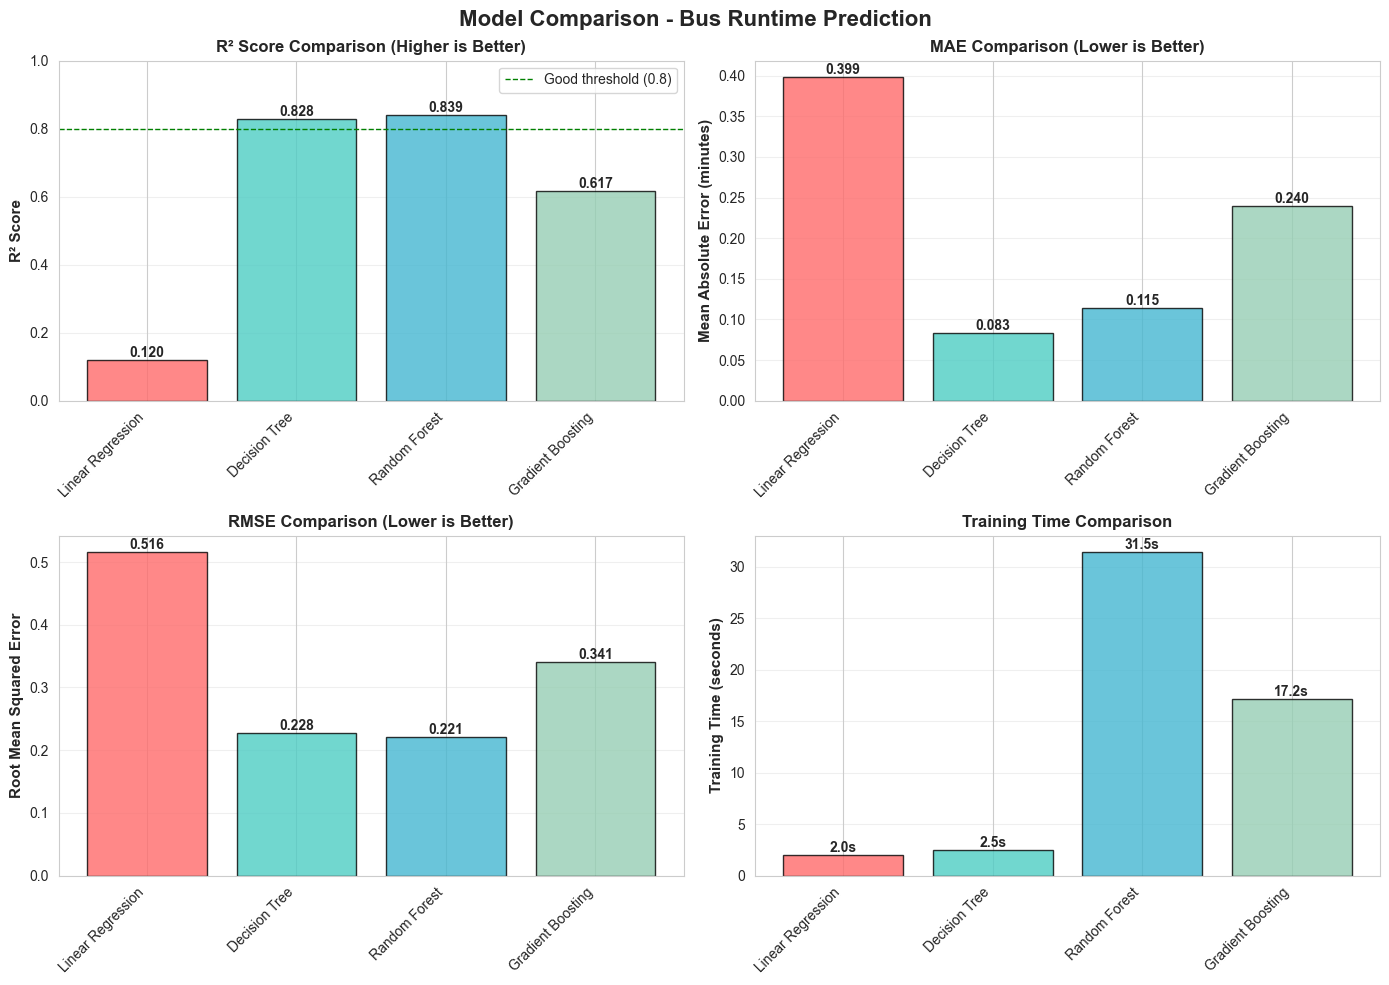


RECOMMENDED MODEL: Random Forest

   Selected based on:
   • Highest R² score: 0.8386
   • MAE: 0.1146 minutes
   • Training time: 31.45 seconds

   This model will be used for the prediction system.

Model comparison complete


In [10]:
# Model Comparison: Train and evaluate multiple regression models
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd
import matplotlib.pyplot as plt
import time

evaluator_mae = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='mae')
evaluator_rmse = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
evaluator_r2 = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='r2')

results = []

print("Training and evaluating multiple models...")

print("\n1. LINEAR REGRESSION (Baseline Model)")

start_time = time.time()
lr = LinearRegression(featuresCol='features', labelCol='label', maxIter=10)
lr_model = lr.fit(train_data)
lr_time = time.time() - start_time

lr_predictions = lr_model.transform(test_data)
lr_mae = evaluator_mae.evaluate(lr_predictions)
lr_rmse = evaluator_rmse.evaluate(lr_predictions)
lr_r2 = evaluator_r2.evaluate(lr_predictions)

print(f"Training time: {lr_time:.2f} seconds")
print(f"   MAE:  {lr_mae:.4f} minutes")
print(f"   RMSE: {lr_rmse:.4f} minutes")
print(f"   R²:   {lr_r2:.4f} ({lr_r2*100:.2f}%)")

results.append({
    'Model': 'Linear Regression',
    'MAE': lr_mae,
    'RMSE': lr_rmse,
    'R²': lr_r2,
    'Training Time (s)': lr_time
})

print("\n2. DECISION TREE REGRESSOR")

start_time = time.time()
dt = DecisionTreeRegressor(featuresCol='features', labelCol='label', maxDepth=15, minInstancesPerNode=5, seed=42)
dt_model = dt.fit(train_data)
dt_time = time.time() - start_time

dt_predictions = dt_model.transform(test_data)
dt_mae = evaluator_mae.evaluate(dt_predictions)
dt_rmse = evaluator_rmse.evaluate(dt_predictions)
dt_r2 = evaluator_r2.evaluate(dt_predictions)

print(f"Training time: {dt_time:.2f} seconds")
print(f"   MAE:  {dt_mae:.4f} minutes")
print(f"   RMSE: {dt_rmse:.4f} minutes")
print(f"   R²:   {dt_r2:.4f} ({dt_r2*100:.2f}%)")

results.append({
    'Model': 'Decision Tree',
    'MAE': dt_mae,
    'RMSE': dt_rmse,
    'R²': dt_r2,
    'Training Time (s)': dt_time
})

print("\n3. RANDOM FOREST REGRESSOR (Current Model)")

rf_predictions = rf_model.transform(test_data)
rf_mae = evaluator_mae.evaluate(rf_predictions)
rf_rmse = evaluator_rmse.evaluate(rf_predictions)
rf_r2 = evaluator_r2.evaluate(rf_predictions)

print(f"Training time: {training_time:.2f} seconds")
print(f"   MAE:  {rf_mae:.4f} minutes")
print(f"   RMSE: {rf_rmse:.4f} minutes")
print(f"   R²:   {rf_r2:.4f} ({rf_r2*100:.2f}%)")

results.append({
    'Model': 'Random Forest',
    'MAE': rf_mae,
    'RMSE': rf_rmse,
    'R²': rf_r2,
    'Training Time (s)': training_time
})

print("\n4. GRADIENT BOOSTING TREES (Advanced Model)")
print("Training (this may take 2-3 minutes)...")

start_time = time.time()
gbt = GBTRegressor(featuresCol='features', labelCol='label', maxIter=50, maxDepth=5, seed=42)
gbt_model = gbt.fit(train_data)
gbt_time = time.time() - start_time

gbt_predictions = gbt_model.transform(test_data)
gbt_mae = evaluator_mae.evaluate(gbt_predictions)
gbt_rmse = evaluator_rmse.evaluate(gbt_predictions)
gbt_r2 = evaluator_r2.evaluate(gbt_predictions)

print(f"Training time: {gbt_time:.2f} seconds")
print(f"   MAE:  {gbt_mae:.4f} minutes")
print(f"   RMSE: {gbt_rmse:.4f} minutes")
print(f"   R²:   {gbt_r2:.4f} ({gbt_r2*100:.2f}%)")

results.append({
    'Model': 'Gradient Boosting',
    'MAE': gbt_mae,
    'RMSE': gbt_rmse,
    'R²': gbt_r2,
    'Training Time (s)': gbt_time
})

print("\nModel Comparison Summary:")
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

best_r2_idx = results_df['R²'].idxmax()
best_mae_idx = results_df['MAE'].idxmin()

print("\nBEST MODELS:")
print(f"   Best R² Score:  {results_df.loc[best_r2_idx, 'Model']} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")
print(f"   Lowest MAE:     {results_df.loc[best_mae_idx, 'Model']} (MAE = {results_df.loc[best_mae_idx, 'MAE']:.4f} min)")

print("\nGenerating comparison visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison - Bus Runtime Prediction', fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
bars1 = ax1.bar(results_df['Model'], results_df['R²'], color=colors, alpha=0.8, edgecolor='black')
ax1.set_ylabel('R² Score', fontsize=11, fontweight='bold')
ax1.set_title('R² Score Comparison (Higher is Better)', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0.8, color='green', linestyle='--', linewidth=1, label='Good threshold (0.8)')
ax1.legend()
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax2 = axes[0, 1]
bars2 = ax2.bar(results_df['Model'], results_df['MAE'], color=colors, alpha=0.8, edgecolor='black')
ax2.set_ylabel('Mean Absolute Error (minutes)', fontsize=11, fontweight='bold')
ax2.set_title('MAE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax3 = axes[1, 0]
bars3 = ax3.bar(results_df['Model'], results_df['RMSE'], color=colors, alpha=0.8, edgecolor='black')
ax3.set_ylabel('Root Mean Squared Error', fontsize=11, fontweight='bold')
ax3.set_title('RMSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax4 = axes[1, 1]
bars4 = ax4.bar(results_df['Model'], results_df['Training Time (s)'], color=colors, alpha=0.8, edgecolor='black')
ax4.set_ylabel('Training Time (seconds)', fontsize=11, fontweight='bold')
ax4.set_title('Training Time Comparison', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}s', ha='center', va='bottom', fontweight='bold')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("Comparison plot saved as 'model_comparison.png'")
plt.show()

winning_model = results_df.loc[best_r2_idx, 'Model']
print(f"\nRECOMMENDED MODEL: {winning_model}")
print(f"\n   Selected based on:")
print(f"   • Highest R² score: {results_df.loc[best_r2_idx, 'R²']:.4f}")
print(f"   • MAE: {results_df.loc[best_r2_idx, 'MAE']:.4f} minutes")
print(f"   • Training time: {results_df.loc[best_r2_idx, 'Training Time (s)']:.2f} seconds")
print(f"\n   This model will be used for the prediction system.")

print("\nModel comparison complete")


## Phase 9: Model Evaluation 


Making predictions on test set...
Generated 13,309 predictions

Regression Metrics:

Performance Metrics:
   Mean Absolute Error (MAE):      0.1146 minutes
   Root Mean Squared Error (RMSE): 0.2212 minutes
   Mean Squared Error (MSE):       0.0489
   R-Squared (R²):                 0.8386

Model Performance Interpretation:
   Average prediction error: ±0.115 minutes (6.9 seconds)
   Model explains 83.86% of variance in runtime
   RMSE penalizes large errors: 0.221 minutes

Model Quality: VERY GOOD

Sample Predictions (First 20):

  Actual (min)  Predicted (min)     Error  Abs Error   Error %
          1.0         1.406321 -0.406321   0.406321 40.632093
          1.0         1.488707 -0.488707   0.488707 48.870725
          1.0         1.488707 -0.488707   0.488707 48.870725
          2.0         1.850438  0.149562   0.149562  7.478076
          2.0         1.864657  0.135343   0.135343  6.767147
          2.0         1.873038  0.126962   0.126962  6.348100
          2.0         1.90982

/var/folders/lr/qxmr3m1n4tx8t9z32sjs3rrr0000gn/T/ipykernel_97826/3985795305.py:162: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax5.boxplot([residuals], labels=['Residuals'], vert=True, patch_artist=True,



Comprehensive evaluation saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/07_random_forest_evaluation.png


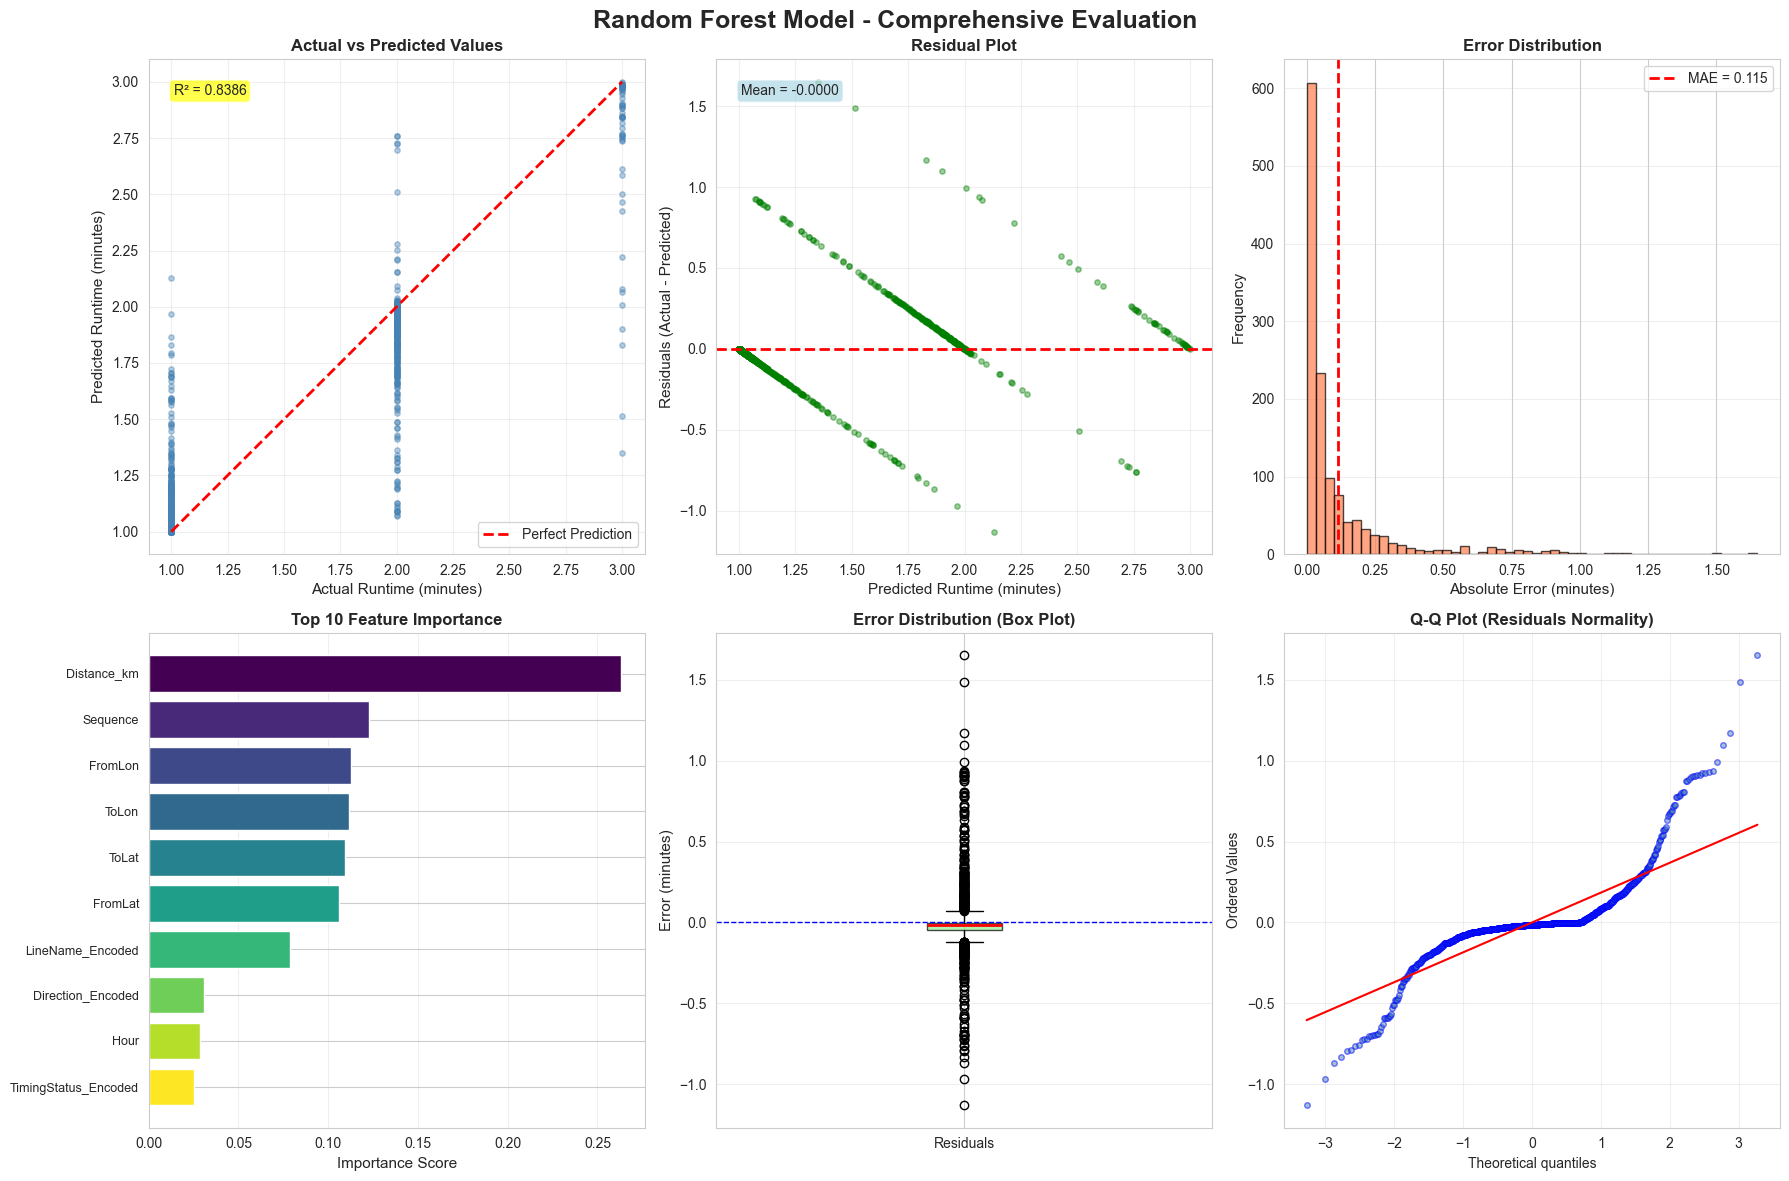


Generating individual evaluation plots...
Saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/08_actual_vs_predicted.png
Saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/09_residuals_plot.png
Saved: /Users/dikshanta/Documents/Assignment-Big-Data/Visualizations/10_feature_importance.png

All visualizations saved successfully!

Model Evaluation Summary:

RANDOM FOREST REGRESSOR - FINAL REPORT

MODEL CONFIGURATION:
  • Number of Trees: 100
  • Max Depth: 15
  • Training Time: 31.45 seconds

DATASET:
  • Training Samples: 54,158 (80%)
  • Test Samples: 13,309 (20%)
  • Total Features: 12

PERFORMANCE METRICS:
  • Mean Absolute Error (MAE): 0.1146 minutes
  • Root Mean Squared Error (RMSE): 0.2212 minutes
  • R-Squared (R²): 0.8386 (83.86%)
  • Mean Squared Error (MSE): 0.0489

PREDICTION ACCURACY:
  • Within ±1 minute: 99.65%
  • Within ±2 minutes: 100.00%
  • Within ±5 minutes: 100.00%

MODEL QUALITY: VERY GOOD

TOP 3 IMPORTANT FEATURES:
  1. Distance

In [11]:
# Model Evaluation: Performance metrics and visualizations
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Making predictions on test set...")
predictions = rf_model.transform(test_data)
print(f"Generated {test_count:,} predictions")

print("\nRegression Metrics:")

evaluator_mae = RegressionEvaluator(
    labelCol='label',
    predictionCol='prediction',
    metricName='mae'
)
mae = evaluator_mae.evaluate(predictions)

evaluator_rmse = RegressionEvaluator(
    labelCol='label',
    predictionCol='prediction',
    metricName='rmse'
)
rmse = evaluator_rmse.evaluate(predictions)

evaluator_r2 = RegressionEvaluator(
    labelCol='label',
    predictionCol='prediction',
    metricName='r2'
)
r2 = evaluator_r2.evaluate(predictions)

evaluator_mse = RegressionEvaluator(
    labelCol='label',
    predictionCol='prediction',
    metricName='mse'
)
mse = evaluator_mse.evaluate(predictions)

print(f"\nPerformance Metrics:")
print(f"   Mean Absolute Error (MAE):      {mae:.4f} minutes")
print(f"   Root Mean Squared Error (RMSE): {rmse:.4f} minutes")
print(f"   Mean Squared Error (MSE):       {mse:.4f}")
print(f"   R-Squared (R²):                 {r2:.4f}")

print(f"\nModel Performance Interpretation:")
print(f"   Average prediction error: ±{mae:.3f} minutes ({mae*60:.1f} seconds)")
print(f"   Model explains {r2*100:.2f}% of variance in runtime")
print(f"   RMSE penalizes large errors: {rmse:.3f} minutes")

if r2 > 0.9:
    quality = "EXCELLENT"
elif r2 > 0.8:
    quality = "VERY GOOD"
elif r2 > 0.7:
    quality = "GOOD"
elif r2 > 0.6:
    quality = "FAIR"
else:
    quality = "NEEDS IMPROVEMENT"

print(f"\nModel Quality: {quality}")

print("\nSample Predictions (First 20):")

sample_predictions = predictions.select('label', 'prediction').limit(20).toPandas()
sample_predictions['Error'] = sample_predictions['label'] - sample_predictions['prediction']
sample_predictions['Abs_Error'] = np.abs(sample_predictions['Error'])
sample_predictions['Error_Percentage'] = (sample_predictions['Abs_Error'] / sample_predictions['label']) * 100

sample_predictions.columns = ['Actual (min)', 'Predicted (min)', 'Error', 'Abs Error', 'Error %']

print("\n", sample_predictions.to_string(index=False))

print(f"\nAverage error in sample: {sample_predictions['Abs Error'].mean():.3f} minutes")

print("\nError Analysis:")

pred_errors = predictions.select('label', 'prediction').toPandas()
pred_errors['Error'] = pred_errors['label'] - pred_errors['prediction']
pred_errors['Abs_Error'] = np.abs(pred_errors['Error'])
pred_errors['Squared_Error'] = pred_errors['Error'] ** 2

print(f"\nError Statistics:")
print(f"   Mean Error:              {pred_errors['Error'].mean():.4f} minutes")
print(f"   Std Dev of Errors:       {pred_errors['Error'].std():.4f} minutes")
print(f"   Min Error:               {pred_errors['Error'].min():.4f} minutes")
print(f"   Max Error:               {pred_errors['Error'].max():.4f} minutes")
print(f"   Median Absolute Error:   {pred_errors['Abs_Error'].median():.4f} minutes")

print(f"\nError Percentiles:")
print(f"   25th percentile: {np.percentile(pred_errors['Abs_Error'], 25):.4f} minutes")
print(f"   50th percentile: {np.percentile(pred_errors['Abs_Error'], 50):.4f} minutes")
print(f"   75th percentile: {np.percentile(pred_errors['Abs_Error'], 75):.4f} minutes")
print(f"   95th percentile: {np.percentile(pred_errors['Abs_Error'], 95):.4f} minutes")

within_1min = (pred_errors['Abs_Error'] <= 1).sum() / len(pred_errors) * 100
within_2min = (pred_errors['Abs_Error'] <= 2).sum() / len(pred_errors) * 100
within_5min = (pred_errors['Abs_Error'] <= 5).sum() / len(pred_errors) * 100

print(f"\nPrediction Accuracy:")
print(f"   Within ±1 minute:  {within_1min:.2f}% of predictions")
print(f"   Within ±2 minutes: {within_2min:.2f}% of predictions")
print(f"   Within ±5 minutes: {within_5min:.2f}% of predictions")

print("\nGenerating evaluation visualizations...")

plot_sample = predictions.select('label', 'prediction').sample(False, 0.1, seed=42).toPandas()
plot_sample.columns = ['Actual', 'Predicted']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Random Forest Model - Comprehensive Evaluation', fontsize=18, fontweight='bold')

ax1 = axes[0, 0]
ax1.scatter(plot_sample['Actual'], plot_sample['Predicted'], alpha=0.4, s=15, color='steelblue')
ax1.plot([plot_sample['Actual'].min(), plot_sample['Actual'].max()], 
         [plot_sample['Actual'].min(), plot_sample['Actual'].max()], 
         'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Runtime (minutes)', fontsize=11)
ax1.set_ylabel('Predicted Runtime (minutes)', fontsize=11)
ax1.set_title('Actual vs Predicted Values', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax1.transAxes, 
         va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax2 = axes[0, 1]
residuals = plot_sample['Actual'] - plot_sample['Predicted']
ax2.scatter(plot_sample['Predicted'], residuals, alpha=0.4, s=15, color='green')
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted Runtime (minutes)', fontsize=11)
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=11)
ax2.set_title('Residual Plot', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.text(0.05, 0.95, f'Mean = {residuals.mean():.4f}', transform=ax2.transAxes, 
         va='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

ax3 = axes[0, 2]
abs_errors = np.abs(residuals)
ax3.hist(abs_errors, bins=50, edgecolor='black', alpha=0.7, color='coral')
ax3.axvline(mae, color='r', linestyle='--', lw=2, label=f'MAE = {mae:.3f}')
ax3.set_xlabel('Absolute Error (minutes)', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Error Distribution', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

ax4 = axes[1, 0]
top_10_features = importance_df.head(10)
colors_feat = plt.cm.viridis(np.linspace(0, 1, len(top_10_features)))
ax4.barh(range(len(top_10_features)), top_10_features['Importance'], color=colors_feat)
ax4.set_yticks(range(len(top_10_features)))
ax4.set_yticklabels(top_10_features['Feature'], fontsize=9)
ax4.set_xlabel('Importance Score', fontsize=11)
ax4.set_title('Top 10 Feature Importance', fontsize=12, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(True, alpha=0.3, axis='x')

ax5 = axes[1, 1]
ax5.boxplot([residuals], labels=['Residuals'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax5.axhline(y=0, color='blue', linestyle='--', lw=1)
ax5.set_ylabel('Error (minutes)', fontsize=11)
ax5.set_title('Error Distribution (Box Plot)', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

ax6 = axes[1, 2]
from scipy import stats
stats.probplot(residuals, dist="norm", plot=ax6)
ax6.set_title('Q-Q Plot (Residuals Normality)', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3)
ax6.get_lines()[0].set_markerfacecolor('steelblue')
ax6.get_lines()[0].set_markersize(4)
ax6.get_lines()[0].set_alpha(0.5)

plt.tight_layout()
plt.savefig(f'{output_dir}/07_random_forest_evaluation.png', dpi=300, bbox_inches='tight')
print(f"\nComprehensive evaluation saved: {output_dir}/07_random_forest_evaluation.png")
plt.show()
plt.close()

print("\nGenerating individual evaluation plots...")

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(plot_sample['Actual'], plot_sample['Predicted'], alpha=0.5, s=20, color='steelblue')
ax.plot([plot_sample['Actual'].min(), plot_sample['Actual'].max()], 
        [plot_sample['Actual'].min(), plot_sample['Actual'].max()], 
        'r--', lw=3, label='Perfect Prediction')
ax.set_xlabel('Actual Runtime (minutes)', fontsize=13)
ax.set_ylabel('Predicted Runtime (minutes)', fontsize=13)
ax.set_title('Actual vs Predicted Values', fontsize=15, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {r2:.4f}\\nMAE = {mae:.4f} min\\nRMSE = {rmse:.4f} min', 
        transform=ax.transAxes, va='top', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
plt.tight_layout()
plt.savefig(f'{output_dir}/08_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved: {output_dir}/08_actual_vs_predicted.png")

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(plot_sample['Predicted'], residuals, alpha=0.5, s=20, color='green')
ax.axhline(y=0, color='r', linestyle='--', lw=3, label='Zero Error')
ax.set_xlabel('Predicted Runtime (minutes)', fontsize=13)
ax.set_ylabel('Residuals (Actual - Predicted)', fontsize=13)
ax.set_title('Residual Plot - Error Analysis', fontsize=15, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'Mean Residual = {residuals.mean():.4f}\\nStd Dev = {residuals.std():.4f}', 
        transform=ax.transAxes, va='top', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
plt.tight_layout()
plt.savefig(f'{output_dir}/09_residuals_plot.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved: {output_dir}/09_residuals_plot.png")

fig, ax = plt.subplots(figsize=(10, 8))
top_15_features = importance_df.head(15)
colors_importance = plt.cm.viridis(np.linspace(0, 1, len(top_15_features)))
bars = ax.barh(range(len(top_15_features)), top_15_features['Importance'], color=colors_importance)
ax.set_yticks(range(len(top_15_features)))
ax.set_yticklabels(top_15_features['Feature'], fontsize=10)
ax.set_xlabel('Importance Score', fontsize=13)
ax.set_title('Feature Importance - Top 15 Features', fontsize=15, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

for i, (bar, val) in enumerate(zip(bars, top_15_features['Importance'])):
    ax.text(val, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
            va='center', ha='left', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_dir}/10_feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved: {output_dir}/10_feature_importance.png")

print("\nAll visualizations saved successfully!")

print("\nModel Evaluation Summary:")

print(f"""
RANDOM FOREST REGRESSOR - FINAL REPORT

MODEL CONFIGURATION:
  • Number of Trees: {rf_model.getNumTrees}
  • Max Depth: {rf.getMaxDepth()}
  • Training Time: {training_time:.2f} seconds

DATASET:
  • Training Samples: {train_count:,} (80%)
  • Test Samples: {test_count:,} (20%)
  • Total Features: {len(feature_cols)}

PERFORMANCE METRICS:
  • Mean Absolute Error (MAE): {mae:.4f} minutes
  • Root Mean Squared Error (RMSE): {rmse:.4f} minutes
  • R-Squared (R²): {r2:.4f} ({r2*100:.2f}%)
  • Mean Squared Error (MSE): {mse:.4f}

PREDICTION ACCURACY:
  • Within ±1 minute: {within_1min:.2f}%
  • Within ±2 minutes: {within_2min:.2f}%
  • Within ±5 minutes: {within_5min:.2f}%

MODEL QUALITY: {quality}

TOP 3 IMPORTANT FEATURES:
  1. {importance_df.iloc[0]['Feature']}: {importance_df.iloc[0]['Importance']:.4f}
  2. {importance_df.iloc[1]['Feature']}: {importance_df.iloc[1]['Importance']:.4f}
  3. {importance_df.iloc[2]['Feature']}: {importance_df.iloc[2]['Importance']:.4f}

Model is ready for deployment and predictions!
""")


## Phase 10: Model Prediction

In [12]:
## Prediction 
import builtins

print("Analyzing route database...")

route_sequences = df_processed.select(
    'LineName', 'Direction', 'JourneyCode', 'Sequence', 
    'FromStopRef', 'FromStopName', 'FromLat', 'FromLon',
    'ToStopRef', 'ToStopName', 'ToLat', 'ToLon'
).orderBy('LineName', 'Direction', 'JourneyCode', 'Sequence').toPandas()

route_encodings = df_processed.select('LineName', 'LineName_Encoded').distinct().toPandas()
route_encoding_map = dict(zip(route_encodings['LineName'], route_encodings['LineName_Encoded']))

direction_encodings = df_processed.select('Direction', 'Direction_Encoded').distinct().toPandas()
direction_encoding_map = dict(zip(direction_encodings['Direction'], direction_encodings['Direction_Encoded']))

timeofday_encodings = df_processed.select('TimeOfDay', 'TimeOfDay_Encoded').distinct().toPandas()
timeofday_encoding_map = dict(zip(timeofday_encodings['TimeOfDay'], timeofday_encodings['TimeOfDay_Encoded']))

print("Validating route combinations...")
valid_combinations = {}

for (route, direction), group in route_sequences.groupby(['LineName', 'Direction']):
    journey_counts = group['JourneyCode'].value_counts()
    if len(journey_counts) == 0:
        continue
    
    representative_journey = journey_counts.index[0]
    journey = group[group['JourneyCode'] == representative_journey].sort_values('Sequence')
    
    meaningful_segments = 0
    for _, row in journey.iterrows():
        import math
        R = 6371
        lat1_r = math.radians(row['FromLat'])
        lon1_r = math.radians(row['FromLon'])
        lat2_r = math.radians(row['ToLat'])
        lon2_r = math.radians(row['ToLon'])
        dlat = lat2_r - lat1_r
        dlon = lon2_r - lon1_r
        a = math.sin(dlat/2)**2 + math.cos(lat1_r) * math.cos(lat2_r) * math.sin(dlon/2)**2
        c = 2 * math.asin(math.sqrt(a))
        dist = R * c
        
        if dist > 0.01:
            meaningful_segments += 1
    
    if meaningful_segments >= 2:
        if route not in valid_combinations:
            valid_combinations[route] = {}
        valid_combinations[route][direction] = meaningful_segments

print(f"Found {len(valid_combinations)} valid routes")
total_combinations = builtins.sum(len(v) for v in valid_combinations.values())
print(f"Total valid route+direction combinations: {total_combinations}")

def calculate_haversine_distance(lat1, lon1, lat2, lon2):
    import math
    R = 6371
    lat1_r, lon1_r = math.radians(lat1), math.radians(lon1)
    lat2_r, lon2_r = math.radians(lat2), math.radians(lon2)
    dlat = lat2_r - lat1_r
    dlon = lon2_r - lon1_r
    a = math.sin(dlat/2)**2 + math.cos(lat1_r) * math.cos(lat2_r) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

def get_time_of_day(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

def get_route_segments(route_name, direction):
    route_data = route_sequences[
        (route_sequences['LineName'] == route_name) & 
        (route_sequences['Direction'] == direction)
    ].copy()
    
    if len(route_data) == 0:
        return [], []
    
    journey_counts = route_data['JourneyCode'].value_counts()
    representative_journey = journey_counts.index[0]
    journey = route_data[route_data['JourneyCode'] == representative_journey].sort_values('Sequence')
    
    segments = []
    stops = []
    seen_stops = set()
    seen_segments = set()
    
    for _, row in journey.iterrows():
        dist = calculate_haversine_distance(
            row['FromLat'], row['FromLon'],
            row['ToLat'], row['ToLon']
        )
        
        if dist > 0.01:
            segment_key = (row['FromStopRef'], row['ToStopRef'])
            
            if segment_key not in seen_segments:
                segments.append({
                    'Sequence': row['Sequence'],
                    'FromStopRef': row['FromStopRef'],
                    'FromStopName': row['FromStopName'],
                    'FromLat': row['FromLat'],
                    'FromLon': row['FromLon'],
                    'ToStopRef': row['ToStopRef'],
                    'ToStopName': row['ToStopName'],
                    'ToLat': row['ToLat'],
                    'ToLon': row['ToLon'],
                    'Distance': dist
                })
                seen_segments.add(segment_key)
            
            if row['FromStopRef'] not in seen_stops:
                stops.append({
                    'StopRef': row['FromStopRef'],
                    'StopName': row['FromStopName'],
                    'Lat': row['FromLat'],
                    'Lon': row['FromLon']
                })
                seen_stops.add(row['FromStopRef'])
    
    if len(segments) > 0:
        last_seg = segments[-1]
        if last_seg['ToStopRef'] not in seen_stops:
            stops.append({
                'StopRef': last_seg['ToStopRef'],
                'StopName': last_seg['ToStopName'],
                'Lat': last_seg['ToLat'],
                'Lon': last_seg['ToLon']
            })
    
    return segments, stops

def predict_segment(segment, route_name, direction, hour):
    distance = segment['Distance']
    is_rush_hour = 1 if (7 <= hour <= 9) or (16 <= hour <= 18) else 0
    time_of_day = get_time_of_day(hour)
    
    line_encoded = route_encoding_map.get(route_name, 0)
    direction_encoded = direction_encoding_map.get(direction, 0)
    timing_encoded = 0
    timeofday_encoded = timeofday_encoding_map.get(time_of_day, 0)
    
    from pyspark.sql import Row
    input_row = Row(
        LineName_Encoded=float(line_encoded),
        Direction_Encoded=float(direction_encoded),
        Sequence=float(segment['Sequence']),
        TimingStatus_Encoded=float(timing_encoded),
        Distance_km=float(distance),
        Hour=float(hour),
        IsRushHour=float(is_rush_hour),
        TimeOfDay_Encoded=float(timeofday_encoded),
        FromLat=float(segment['FromLat']),
        FromLon=float(segment['FromLon']),
        ToLat=float(segment['ToLat']),
        ToLon=float(segment['ToLon'])
    )
    
    input_df = spark.createDataFrame([input_row])
    input_assembled = assembler.transform(input_df)
    input_scaled = scaler_model.transform(input_assembled)
    prediction_result = rf_model.transform(input_scaled)
    
    return prediction_result.select('prediction').collect()[0][0]

def show_options(items, title):
    print(f"\n{title}")
    for i, item in enumerate(items, 1):
        print(f"  {i}. {item}")
    
    while True:
        try:
            choice = input(f"Enter choice (1-{len(items)}): ").strip()
            choice_num = int(choice)
            if 1 <= choice_num <= len(items):
                return items[choice_num - 1]
            else:
                print(f"Please enter a number between 1 and {len(items)}")
        except ValueError:
            print("Please enter a valid number")
        except KeyboardInterrupt:
            return None

print("READY FOR PREDICTIONS")

while True:
    try:
        print("ENTER JOURNEY DETAILS")
        
        sorted_routes = sorted(valid_combinations.keys())
        route_display = []
        for route in sorted_routes:
            directions = list(valid_combinations[route].keys())
            direction_str = ", ".join(directions)
            route_display.append(f"Route {route} ({direction_str})")
        
        selected_route_display = show_options(route_display, "Available Routes with Directions:")
        if selected_route_display is None:
            break
        
        route_num = selected_route_display.split()[1]
        print(f"Selected: Route {route_num}")
        
        available_directions = list(valid_combinations[route_num].keys())
        
        if len(available_directions) == 1:
            selected_direction = available_directions[0]
            print(f"Only one direction available: {selected_direction}")
        else:
            direction_display = []
            for d in available_directions:
                seg_count = valid_combinations[route_num][d]
                direction_display.append(f"{d} ({seg_count} segments)")
            
            selected = show_options(direction_display, "Available Directions:")
            if selected is None:
                break
            selected_direction = selected.split()[0]
            print(f"Selected: {selected_direction}")
        
        segments, stops = get_route_segments(route_num, selected_direction)
        
        if len(stops) < 2:
            print("Error loading route data")
            continue
        
        print(f"Route has {len(stops)} stops and {len(segments)} segments")
        
        print("SELECT STARTING STOP")
        for i, stop in enumerate(stops, 1):
            print(f"  {i}. {stop['StopName']}")
        
        while True:
            try:
                from_choice = int(input(f"Enter starting stop (1-{len(stops)}): ").strip())
                if 1 <= from_choice <= len(stops):
                    from_stop = stops[from_choice - 1]
                    from_idx = from_choice - 1
                    break
                print("Invalid range")
            except ValueError:
                print("Invalid number")
        
        print(f"From: {from_stop['StopName']}")
        
        available_to_stops = stops[from_choice:]
        
        if len(available_to_stops) < 2:
            print("No destination stops available")
            continue
        
        print("SELECT DESTINATION STOP")
        for i, stop in enumerate(available_to_stops, 1):
            print(f"  {i}. {stop['StopName']}")
        
        while True:
            try:
                to_choice = int(input(f"Enter destination stop (1-{len(available_to_stops)}): ").strip())
                if 1 <= to_choice <= len(available_to_stops):
                    to_stop = available_to_stops[to_choice - 1]
                    break
                print("Invalid range")
            except ValueError:
                print("Invalid number")
        
        print(f"To: {to_stop['StopName']}")
        
        while True:
            hour_input = input("Enter hour (0-23): ").strip()
            try:
                hour = int(hour_input)
                if 0 <= hour <= 23:
                    break
                print("Invalid hour")
            except ValueError:
                print("Invalid number")
        
        to_idx = stops.index(to_stop)
        
        journey_segments = []
        for seg in segments:
            seg_from_idx = next((i for i, s in enumerate(stops) if s['StopRef'] == seg['FromStopRef']), None)
            if seg_from_idx is not None and from_idx <= seg_from_idx < to_idx:
                journey_segments.append(seg)
        
        if len(journey_segments) == 0:
            print("No valid segments found")
            continue
        
        total_time = 0
        total_distance = 0
        segment_details = []
        
        for segment in journey_segments:
            segment_time = predict_segment(segment, route_num, selected_direction, hour)
            total_time += segment_time
            total_distance += segment['Distance']
            
            segment_details.append({
                'from': segment['FromStopName'],
                'to': segment['ToStopName'],
                'time': segment_time,
                'distance': segment['Distance']
            })
        
        is_rush_hour = 1 if (7 <= hour <= 9) or (16 <= hour <= 18) else 0
        
        print("="*70)
        print("JOURNEY PREDICTION")
        print("="*70)
        
        print(f"Route: Route {route_num}")
        print(f"Direction: {selected_direction}")
        print(f"From: {from_stop['StopName']}")
        print(f"To: {to_stop['StopName']}")
        print(f"Segments: {len(journey_segments)}")
        print(f"Total Distance: {total_distance:.2f} km")
        print(f"Departure: {hour:02d}:00 {'Rush Hour' if is_rush_hour else 'Normal'}")
        
        mins = int(total_time)
        secs = int((total_time - mins) * 60)
        print(f"Predicted Travel Time: {total_time:.2f} minutes ({mins}m {secs}s)")
        
        avg_speed = (total_distance / total_time) * 60 if total_time > 0 else 0
        
        print("Analysis:")
        print(f"Average speed: {avg_speed:.1f} km/h")
        
        print("Model Performance:")
        print(f"Model: R² = {r2:.4f} | MAE = ±{mae:.2f} min/segment")
        print(f"Total error range: ±{mae * len(journey_segments):.2f} minutes")
        
        continue_choice = input("Make another prediction? (y/n): ").strip().lower()
        if continue_choice not in ['y', 'yes']:
            print("Thank you for using the prediction system")
            break
            
    except KeyboardInterrupt:
        print("Session ended")
        break
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        continue


Analyzing route database...
Validating route combinations...
Found 27 valid routes
Total valid route+direction combinations: 52
READY FOR PREDICTIONS
ENTER JOURNEY DETAILS

Available Routes with Directions:
  1. Route 12 (inbound, outbound)
  2. Route 28 (inbound, outbound)
  3. Route 39A (inbound, outbound)
  4. Route 39B (inbound, outbound)
  5. Route 39C (inbound, outbound)
  6. Route 40 (inbound, outbound)
  7. Route 400 (inbound, outbound)
  8. Route 408 (inbound, outbound)
  9. Route 436 (inbound, outbound)
  10. Route 437 (inbound, outbound)
  11. Route 456 (inbound, outbound)
  12. Route 461 (inbound, outbound)
  13. Route 479 (inbound, outbound)
  14. Route 514 (inbound, outbound)
  15. Route 515 (inbound, outbound)
  16. Route 557 (inbound, outbound)
  17. Route 564 (outbound)
  18. Route 615 (inbound, outbound)
  19. Route 621 (inbound, outbound)
  20. Route 663 (inbound, outbound)
  21. Route 690 (inbound, outbound)
  22. Route 714 (inbound, outbound)
  23. Route 715 (inbou

Enter choice (1-27):  10


Selected: Route 437

Available Directions:
  1. inbound (135 segments)
  2. outbound (145 segments)


Enter choice (1-2):  2


Selected: outbound
Route has 30 stops and 29 segments
SELECT STARTING STOP
  1. Woking Railway Station (stop 5)
  2. High Street Link Road
  3. Woking Community Hospital
  4. Oriental Road Post Office
  5. Oriental Close
  6. Woking Homes
  7. Lion Retail Park
  8. College Road
  9. Kent Road
  10. Windsor Way
  11. Balmoral Drive
  12. East Hill
  13. Norfolk Farm Road
  14. Pyrford Common Road
  15. Pyrford Court
  16. Warren Farm Home Park
  17. Pyrford Road
  18. Floyds Lane
  19. Engliff Lane
  20. Village Hall
  21. Coldharbour Road
  22. Oakcroft Road
  23. Elmstead Road
  24. Waitrose
  25. West Byfleet Railway Station
  26. Blackwood Close
  27. Dartnell Park Road
  28. The Queens Head
  29. Barnes Wallis Drive
  30. Marks and Spencers


Enter starting stop (1-30):  10


From: Windsor Way
SELECT DESTINATION STOP
  1. Balmoral Drive
  2. East Hill
  3. Norfolk Farm Road
  4. Pyrford Common Road
  5. Pyrford Court
  6. Warren Farm Home Park
  7. Pyrford Road
  8. Floyds Lane
  9. Engliff Lane
  10. Village Hall
  11. Coldharbour Road
  12. Oakcroft Road
  13. Elmstead Road
  14. Waitrose
  15. West Byfleet Railway Station
  16. Blackwood Close
  17. Dartnell Park Road
  18. The Queens Head
  19. Barnes Wallis Drive
  20. Marks and Spencers


Enter destination stop (1-20):  12


To: Oakcroft Road


Enter hour (0-23):  7


JOURNEY PREDICTION
Route: Route 437
Direction: outbound
From: Windsor Way
To: Oakcroft Road
Segments: 12
Total Distance: 5.46 km
Departure: 07:00 Rush Hour
Predicted Travel Time: 13.92 minutes (13m 55s)
Analysis:
Average speed: 23.5 km/h
Model Performance:
Model: R² = 0.8386 | MAE = ±0.11 min/segment
Total error range: ±1.38 minutes


Make another prediction? (y/n):  n


Thank you for using the prediction system



 JOURNEY PREDICTION

 Journey Details:
   Route:           Route 28
   Direction:       outbound
   From:            Woking Railway Station stop2
   To:              Woodbridge Meadows
   Segments:        47
   Total Distance:  17.79 km
   Departure:       07:00 (Rush Hour)

  PREDICTED TRAVEL TIME: 52.33 minutes
   = 52 minute(s) and 20 seconds

 Segment Summary (showing first 5 and last 5):
   1. Woking Railway Station stop2 → High Street Link Road       
      Time: 1.26 min | Distance: 0.34 km
   2. Morrisons                    → Kingsway                    
      Time: 1.81 min | Distance: 0.18 km
   3. Kingsway                     → Bridge Barn Lane            
      Time: 1.05 min | Distance: 0.37 km
   4. Bridge Barn Lane             → The Triangle                
      Time: 1.03 min | Distance: 0.24 km
   5. The Triangle                 → Triggs Lane                 
      Time: 1.08 min | Distance: 0.40 km
   ... 37 more segments ...
   43. Johnston Walk                → Sh

## Phase 11: Model Deployment

In [ ]:
import os
from datetime import datetime

# Configuration
MODEL_DIR = '/Users/dikshanta/Documents/Assignment-Big-Data/Model'
os.makedirs(MODEL_DIR, exist_ok=True)

# Generate timestamp for versioning
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

print("Saving model components...")

# Save the trained PySpark model
model_path = os.path.join(MODEL_DIR, f'rf_model_{timestamp}')
rf_model.save(model_path)
print(f"Model saved: {model_path}")

# Save the scaler
scaler_path = os.path.join(MODEL_DIR, f'scaler_{timestamp}')
scaler_model.save(scaler_path)
print(f"Scaler saved: {scaler_path}")

# Save the assembler
assembler_path = os.path.join(MODEL_DIR, f'assembler_{timestamp}')
assembler.save(assembler_path)
print(f"Assembler saved: {assembler_path}")

# Also save as 'latest' for easy loading
latest_model = os.path.join(MODEL_DIR, 'rf_model_latest')
latest_scaler = os.path.join(MODEL_DIR, 'scaler_latest')
latest_assembler = os.path.join(MODEL_DIR, 'assembler_latest')

# Remove existing latest versions if they exist
import shutil
for path in [latest_model, latest_scaler, latest_assembler]:
    if os.path.exists(path):
        shutil.rmtree(path)

rf_model.save(latest_model)
scaler_model.save(latest_scaler)
assembler.save(latest_assembler)
print(f"Latest model saved: {latest_model}")
print(f"Latest scaler saved: {latest_scaler}")
print(f"Latest assembler saved: {latest_assembler}")

# Save model metadata as JSON (not pickle)
import json
metadata = {
    'timestamp': timestamp,
    'model_type': 'RandomForestRegressor',
    'num_trees': rf_model.getNumTrees,
    'max_depth': rf.getMaxDepth(),
    'features': feature_cols,
    'r2_score': float(r2),
    'mae': float(mae),
    'rmse': float(rmse),
    'training_time': float(training_time)
}

metadata_filename = os.path.join(MODEL_DIR, f'model_metadata_{timestamp}.json')
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"Metadata saved: {metadata_filename}")

print(f"\n{'='*60}")
print(f"All files saved successfully in: {MODEL_DIR}")
print(f"{'='*60}")